# File Ingestion

Files -- complex as they may be -- need to be ingested, inferred, and curated in the data lake. Avro, json, Excel, JDBC, CSV, Parquet, ORC -- all big data files can easily be ingested and inferred.

In [1]:
# Bring the Iris flower dataset from the web
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'

iris_pandas_dataset = pd.read_csv(data_url).drop('Unnamed: 0', axis=1)

# Wrap the pandas object directly as a big data frame
iris_dataset = sqlCtx.createDataFrame(iris_pandas_dataset)

# Just to show a complex data file ingestion as well...
# Save the Pandas object as a JSON file
iris_pandas_dataset.to_json('iris.json', orient='records')

# Just for demonstration, read the JSON file too
iris_dataset = sqlCtx.read.json('iris.json')

# Show a preview of the data
display(iris_dataset.limit(5).toPandas())

# Describe the dataset
display(
    iris_dataset.describe([
        '`{0}`'.format(colname) for colname in iris_dataset.columns
    ]).toPandas())

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


,summary,`Petal.Length`,`Petal.Width`,`Sepal.Length`,`Sepal.Width`,`Species`
0,count,150,150,150,150,150
1,mean,3.7580000000000027,1.199333333333334,5.843333333333335,3.057333333333334,None
2,stddev,1.7652982332594662,0.7622376689603467,0.8280661279778637,0.43586628493669793,None
3,min,1.0,0.1,4.3,2.0,setosa
4,max,6.9,2.5,7.9,4.4,virginica


# Dataset Visualization

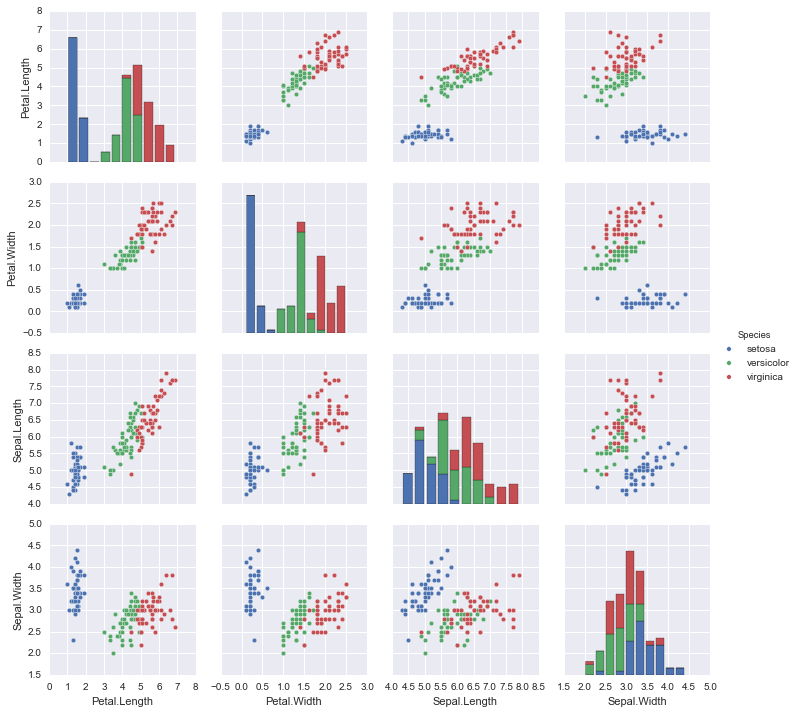

In [2]:
%matplotlib inline
# Plot the dataset
sns.pairplot(iris_dataset.toPandas(), hue="Species")

# Findings

Setosa is of course clearly separable. The Versicolor and Virginica species of Iris are not easily separable.

<hr />